In [102]:
# Charger un DataFrame depuis un fichier Excel
import pandas as pd
df = pd.read_csv('PBC_APL_all_features_noyau.csv')
df.head()

,Nom,Numéro,Aire noyau,Périmètre noyau,Largeur du rectangle minimal,Hauteur du rectangle minimal,Rayon noyau,Petit axe noyau,Grand axe noyau,Excentricité noyau,Périmètre convexe noyau,Solidité noyau,Boîte encadrante,Centre,Chemin image,Classe,dataset
0,ba_11617089.jpg,1,10011.0,669.724963,121,116,56.449980,111.758655,116.225370,0.274565,10828.0,0.924547,"(5, 0, 121, 121)",0,/Users/michaelderoche/Documents/MACHINE LEARNI...,basophil,APL
1,ba_11617706.jpg,1,8676.0,599.020382,119,104,52.551466,98.626314,113.898563,0.500194,9673.0,0.896930,"(5, 5, 109, 124)",0,/Users/michaelderoche/Documents/MACHINE LEARNI...,basophil,APL
2,ba_12025289.jpg,1,14337.0,941.163564,140,137,67.554488,133.059807,145.801369,0.408831,17986.0,0.797120,"(2, 0, 139, 140)",0,/Users/michaelderoche/Documents/MACHINE LEARNI...,basophil,APL
3,ba_12985228.jpg,1,24265.0,1262.626550,254,192,87.885092,143.488341,277.959096,0.856455,37657.0,0.644369,"(5, 0, 197, 254)",0,/Users/michaelderoche/Documents/MACHINE LEARNI...,basophil,APL
4,ba_13158217.jpg,1,30884.0,2314.819551,246,233,99.149798,217.193332,294.703293,0.675904,52296.0,0.590561,"(0, 0, 233, 246)",0,/Users/michaelderoche/Documents/MACHINE LEARNI...,basophil,APL


In [94]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des lignes avec des valeurs aberrantes
outliers = (df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)

# Calcul du nombre total de valeurs aberrantes pour chaque caractéristique
outliers_count = outliers.sum(axis=0)

# Suppression des lignes contenant des valeurs aberrantes
df = df[~(outliers.any(axis=1))]

In [100]:
df['dataset'].value_counts()

dataset
PBC    16578
APL     6692
Name: count, dtype: int64

In [96]:
df['Classe'] = df['Classe'].replace('band neutrophils', 'neutrophil')
df['Classe'].value_counts()

Classe
neutrophil                4294
lymphocyte                3279
eosinophil                3138
ig                        2876
platelet                  2316
monocyte                  2080
blast, no lineage spec    1852
erythroblast              1832
basophil                  1234
lymphocyte, variant        291
giant thrombocyte           31
plasma cells                24
promonocyte                 23
Name: count, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23270 entries, 0 to 26649
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Nom                           23270 non-null  object 
 1   Numéro                        23270 non-null  int64  
 2   Aire noyau                    23270 non-null  float64
 3   Périmètre noyau               23270 non-null  float64
 4   Largeur du rectangle minimal  23270 non-null  int64  
 5   Hauteur du rectangle minimal  23270 non-null  int64  
 6   Rayon noyau                   23270 non-null  float64
 7   Petit axe noyau               23270 non-null  float64
 8   Grand axe noyau               23270 non-null  float64
 9   Excentricité noyau            23270 non-null  float64
 10  Périmètre convexe noyau       23270 non-null  float64
 11  Solidité noyau                23270 non-null  float64
 12  Boîte encadrante              23270 non-null  object 
 13  Centre

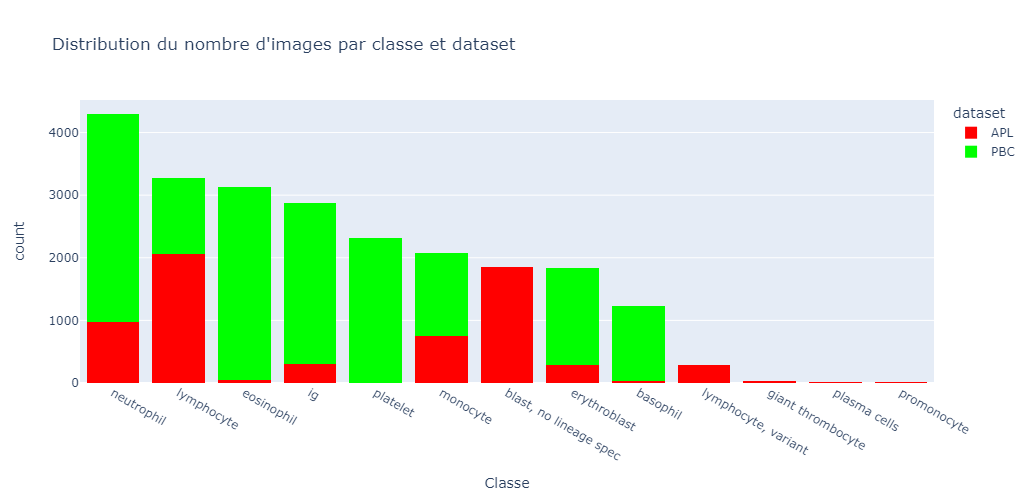

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame

# Create the histogram with Plotly Express
fig = px.histogram(df, x='Classe', color='dataset', title='Distribution du nombre d\'images par classe et dataset',
                  color_discrete_map={'APL': 'red', 'PBC': '#00FF00'})

# Update layout to sort by total count
class_counts = df['Classe'].value_counts().index.tolist()
fig.update_layout(barmode='stack', width=700, height=500, xaxis={'categoryorder': 'array', 'categoryarray': class_counts})
fig.show()
